### Install SDV Community

In [1]:
%pip install sdv

Note: you may need to restart the kernel to use updated packages.


### Install ipykernal && nbformat to avoid Mime type rendering issues with visualizations
* `ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed`

In [2]:
%pip install ipykernel
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Load demo data

In [3]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

### Preview demo data

In [4]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


### Visualize metadata

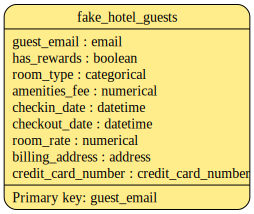

In [5]:
metadata.visualize()

### Create a synthesizer

In [6]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

### Generate synthetic data

In [7]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,0.29,27 Mar 2020,09 Mar 2020,135.15,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,False,DELUXE,8.15,07 Sep 2020,25 Jun 2020,183.24,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,False,BASIC,11.65,22 Mar 2020,01 Apr 2020,163.57,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788
3,humphreyjennifer@example.net,False,BASIC,48.12,04 Jun 2020,14 May 2020,127.75,"8906 Bobby Trail\nEast Sandra, NY 43986",3524946844839485
4,joshuabrown@example.net,False,DELUXE,11.07,08 Jan 2020,13 Jan 2020,180.12,"732 Dennis Lane\nPort Nicholasstad, DE 49786",4446905799576890978


### Evaluate real vs. synthetic data
* Run diagnostic to ensure data is valid

In [8]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 495.80it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



* Measure data quality between real and synthetic data

In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 519.20it/s]|
Column Shapes Score: 90.06%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 120.69it/s]|
Column Pair Trends Score: 89.29%

Overall Score (Average): 89.68%



### Get details on column shapes

In [10]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.982000
1,room_type,TVComplement,0.984000
2,amenities_fee,KSComplement,0.764778
3,checkin_date,KSComplement,0.962000
4,checkout_date,KSComplement,0.968750
5,room_rate,KSComplement,0.742000


### Visualize real vs. synthetic data

In [12]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_rate',
    metadata=metadata
)

fig.show()

### Visualize in 2D (column pair plot)

In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    fig_size=(6, 4),
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata
)

fig.show()

### Anonymize sensitive data (PII)

In [ ]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head()

### Compare desensitized data vs. real data (above)

In [ ]:
synthetic_data[sensitive_column_names].head()

### Save the current state of synthesized data
* Useful when sharing with others or synthesizing more data in the future

In [ ]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = GaussianCopulaSynthesizer.load('my_synthesizer.pkl')

## Gaussian Copula customization

In [ ]:
custom_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    default_distribution='truncnorm',
    numerical_distributions={
        'checkin_date': 'uniform',
        'checkout_date': 'uniform',
        'room_rate': 'gaussian_kde'
    }
)

custom_synthesizer.fit(real_data)

#### Inspect the distributions after training.
This synthesizer returns a learned parameter during `truncnorm` distribution.
* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html">More information</a> available in `scipy` truncnorm distribution documentation.  

In [ ]:
learned_distributions = custom_synthesizer.get_learned_distributions()
learned_distributions['has_rewards']

* By strategically setting distributions, tradeoffs can be made in the quality of synthetic data.

In [ ]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

### Visualize customized synthetic data

In [ ]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data_customized,
    column_name='room_rate',
    metadata=metadata
)

fig.show()

### Conditional Sampling
* Simulate hypothetical scenarios by using Gaussian Copula to efficiently sample conditions.
* In the below example, every guest is staying in a `suite` <i>(1/2 w/ rewards, 1/2 without)</i>

In [ ]:
from sdv.sampling import Condition

suite_guests_with_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': True}
)

suite_guests_without_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': False}
)

### Simulate the scenario using the trained synthesizer

In [ ]:
simulated_synthetic_data = custom_synthesizer.sample_from_conditions(conditions=[
  suite_guests_with_rewards,
  suite_guests_without_rewards
])

### Visualize the data

In [ ]:
fig = get_column_plot(
    fig_size=(6, 4),
    real_data=real_data,
    synthetic_data=simulated_synthetic_data,
    column_name='room_type',
    metadata=metadata
)

fig.update_layout(
    title='Using synthetic data to simulate room_type scenario'
)

fig.show()